# Seleksi Fitur

##### dataset yang digunakan : https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

## 1. Seleksi Unvariate

##### import library

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

##### Memuat data

In [4]:
data = pd.read_csv("mobile_price_classification.csv")
data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


##### Memilih data yg dibutuhkan

In [8]:
X = data.iloc[:,0:20]  
y = data.iloc[:,-1]    

##### menerapkan SelectKBest untuk melakukan ekstraksi

In [9]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

##### menggabungkan 2 dataframe

In [10]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score'))  

          Specs       Score
13     px_width  852.914979
14          ram  562.837207
0            id  223.566155
12    px_height   46.347162
9     mobile_wt   42.328627
5            fc   15.793117
11           pc   11.148155
7    int_memory    1.372252
3   clock_speed    1.052762
16         sc_w    0.809077


## 2. Feature Importance

##### Import Libary

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

##### Memuat data

In [12]:
data = pd.read_csv("mobile_price_classification.csv")
data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


##### melakukan ExtraTreesClassifier untuk mengekstraksi fitur

In [13]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.05889878 0.05618411 0.03035374 0.05617699 0.03043972 0.05729363
 0.02540711 0.05725356 0.05380918 0.06209565 0.05269469 0.05580027
 0.05876501 0.06305834 0.0577264  0.05513303 0.05592004 0.05790088
 0.02235798 0.03273088]


##### melakukan plot dari feature importances

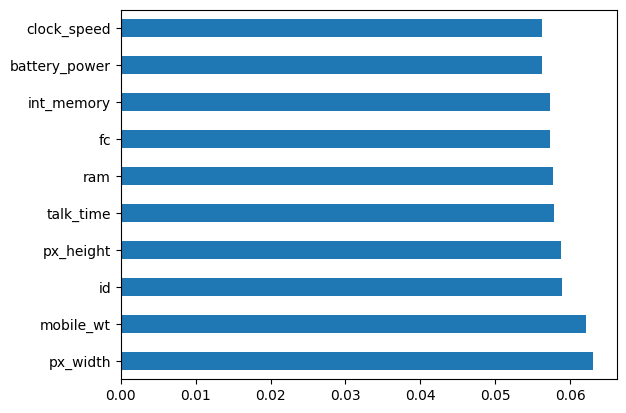

In [14]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## 3. Matriks Korelasi dengan Heatmap

##### Import Libary

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

##### Memuat data

In [16]:
data = pd.read_csv("mobile_price_classification.csv")
X = data.iloc[:,0:20]
y = data.iloc[:,-1]

##### mendapatkan  correlations dari setiap fitur dalam dataset

In [17]:
corrmat = data.corr()
top_corr_features = corrmat.index

##### plot heatmap 

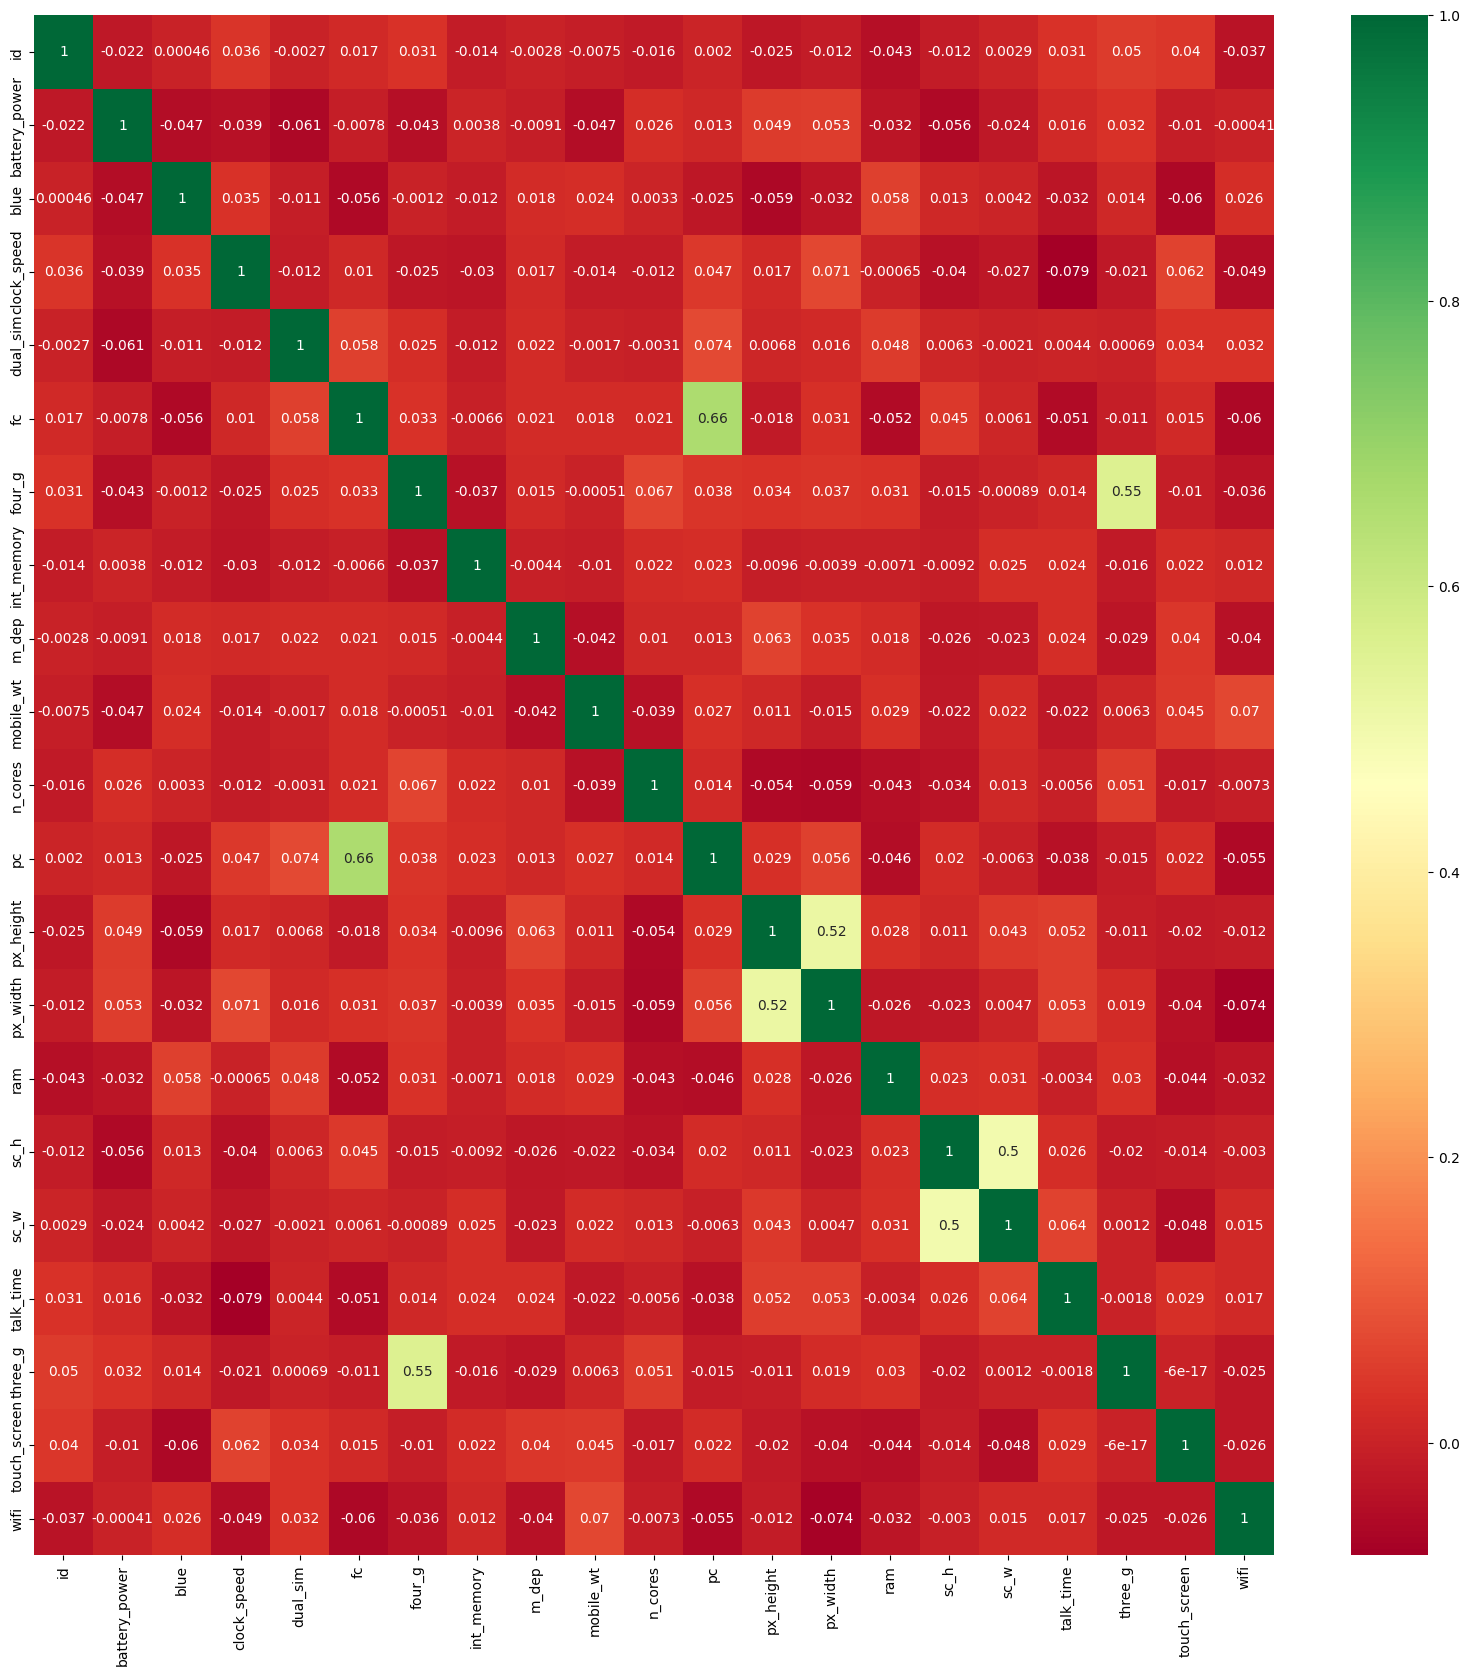

In [18]:
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")